# Talent Mobility Program - Technical Fit Assessment

#### Developed by: Teye Richard Gamah

#### This notebook is submitted as part of the deliverables for the **Azubi Africa Talent Mobility Program - Technical Fit Assessment**.



> **LLM Usage**: Gemini in Google Colab was used to review code samples, make them concised and reduce redundancy as well as providing more detailed insights into the observations from the analysis.

In [27]:
!pip install catboost --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.7 MB/s eta 0:00:00


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
data = pd.read_csv('/content/bank-additional-full.csv', sep = ";")

# Previous first 5 roles
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Exploratory

In [3]:
# Get 10 samples
data.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
31842,43,management,single,university.degree,no,yes,no,telephone,may,thu,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,no
8469,47,technician,married,professional.course,no,no,no,telephone,jun,tue,...,20,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
18140,31,admin.,single,university.degree,no,yes,no,cellular,jul,wed,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
13756,32,blue-collar,married,basic.9y,unknown,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
30230,35,technician,married,professional.course,no,no,no,cellular,apr,thu,...,2,5,1,success,-1.8,93.075,-47.1,1.365,5099.1,yes
17653,53,blue-collar,married,high.school,no,yes,no,cellular,jul,mon,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18968,60,retired,married,university.degree,unknown,yes,yes,cellular,aug,mon,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.970,5228.1,no
35756,49,retired,married,high.school,no,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
29359,42,services,divorced,unknown,no,no,no,cellular,apr,fri,...,2,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
28813,32,services,single,high.school,no,no,no,cellular,apr,thu,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.410,5099.1,no


In [4]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Observation:**

1. The dataset contains 41,188 entries and 21 columns.
2. There are no missing values in any of the columns.
3. The data types include integers (`int64`), floating-point numbers (`float64`), and objects (`object`).
4. The object data types likely represent categorical features that will need to be encoded for most machine learning models.

In [3]:
# Check for missing values
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


This output confirms that there are no missing values in any of the columns in the dataset.

### Exploration of Categorical columns

In [16]:
# Helper function for visualizing categorical columns
def analyze_object_column(dataframe, column_name):
    if column_name in dataframe.columns and dataframe[column_name].dtype == 'object':
        print(f"--- Analysis for column: {column_name} ---")

        # 1. Unique values
        print("\nUnique values:")
        print(dataframe[column_name].unique())

        # 2. Value counts
        print("\nValue counts:")
        print(dataframe[column_name].value_counts())

        # 3. Count plot
        plt.figure(figsize=(8, 5))
        sns.countplot(data=dataframe, x=column_name)
        plt.title(f'Value Counts of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Column '{column_name}' not found or is not of object type.")


#### 1. `job` column

--- Analysis for column: job ---

Unique values:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Value counts:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


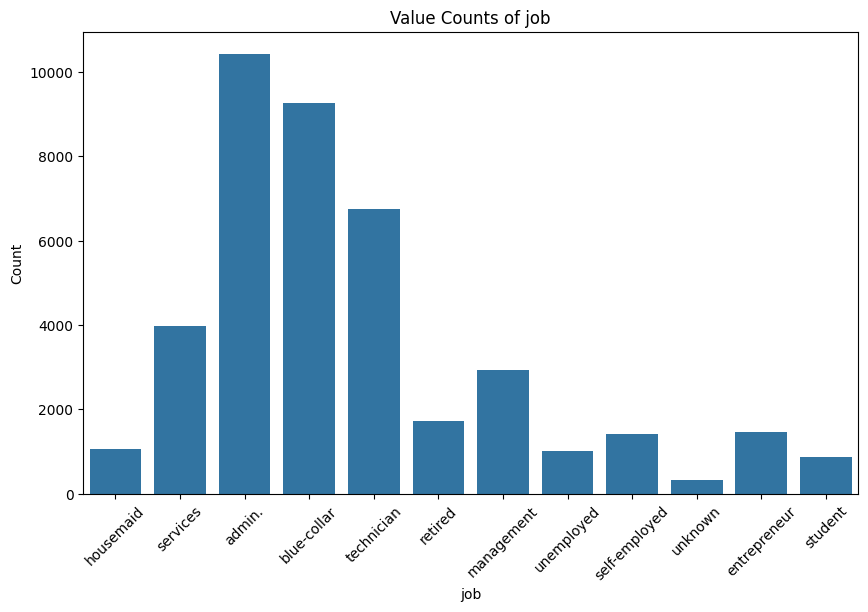

In [17]:
# `job` column
analyze_object_column(data, 'job')

**Observation from `job` column:**

1. The `job` column contains 12 unique categories, including an 'unknown' category.
2. The value counts and the plot show that `admin.`, `blue-collar`, and `technician` are the most frequent job categories in the dataset.
3. The 'unknown' category has a relatively small number of entries.

#### 2. `marital` column

--- Analysis for column: marital ---

Unique values:
['married' 'single' 'divorced' 'unknown']

Value counts:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


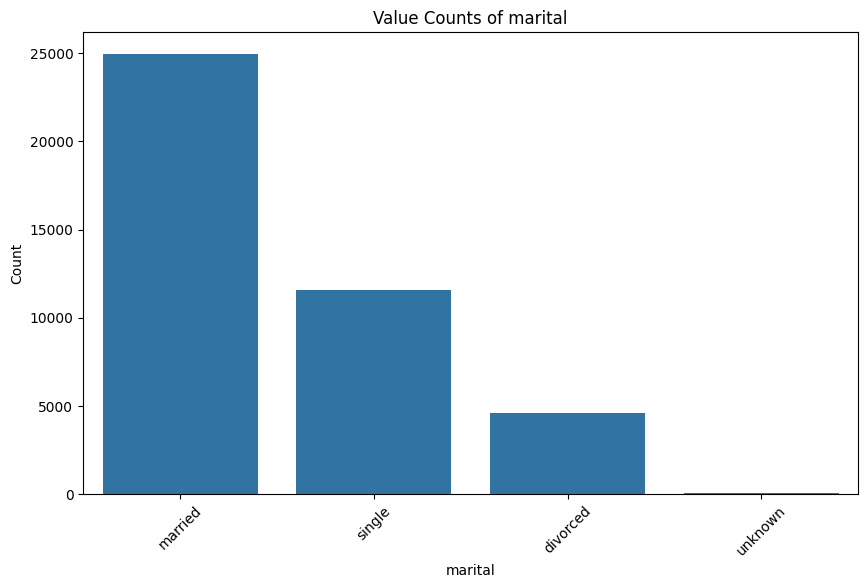

In [18]:
# `marital` column
analyze_object_column(data, 'marital')

**Observation from `marital` column:**

1. The `marital` column contains 4 unique categories, including 'married', 'single', 'divorced', and 'unknown'.
2. The value counts and the plot show that `married` is the most frequent marital status, followed by 'single' and 'divorced'.
3. The `unknown` category has a very small number of entries.

#### 3. `education` column

--- Analysis for column: education ---

Unique values:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Value counts:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


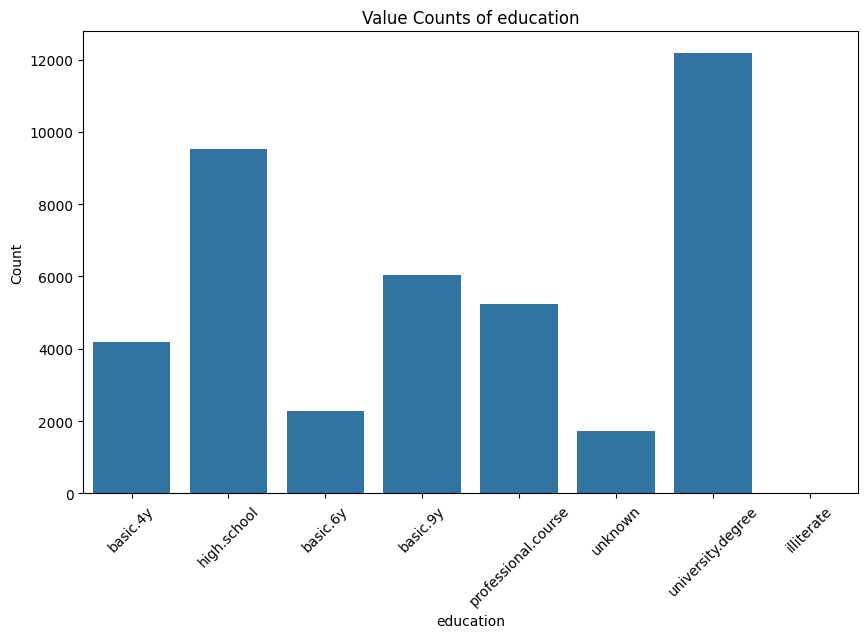

In [19]:
# `education` column
analyze_object_column(data, 'education')

**Observation from `education` column:**

1. The `education` column contains 8 unique categories, including 'unknown' and 'illiterate'.
2. The value counts and the plot show that 'university.degree', 'high.school', and 'basic.9y' are the most frequent education levels.
3. The 'illiterate' category has a very small number of entries, while 'unknown' has a moderate number.

#### 4. `default` column

--- Analysis for column: default ---

Unique values:
['no' 'unknown' 'yes']

Value counts:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64


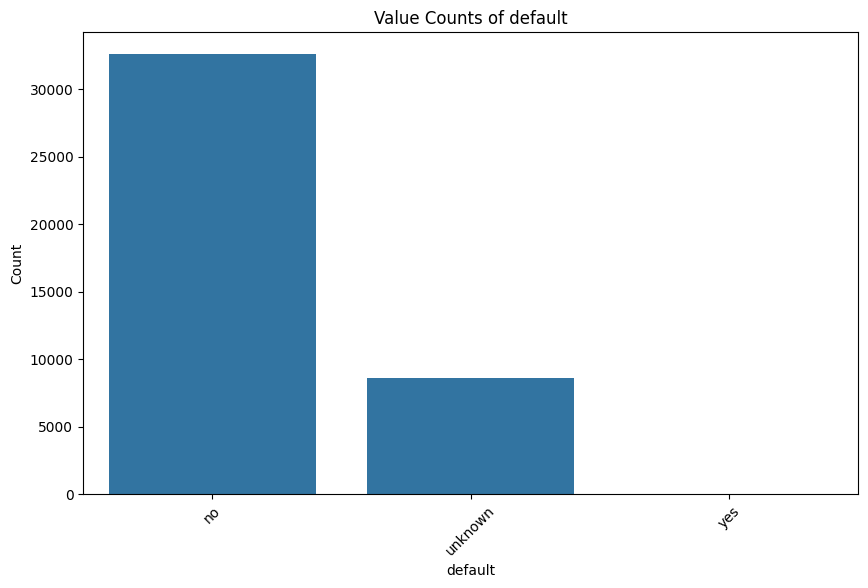

In [20]:
# `default` column
analyze_object_column(data, 'default')

**Observation from `default` column:**

1. The `default` column contains 3 unique categories: 'no', 'unknown', and 'yes'.
2. The value counts and the plot show that 'no' is the overwhelming majority category.
3. The 'unknown' category has a significant number of entries, while 'yes' has a very small number of entries.

#### 5. `housing` column

--- Analysis for column: housing ---

Unique values:
['no' 'yes' 'unknown']

Value counts:
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64


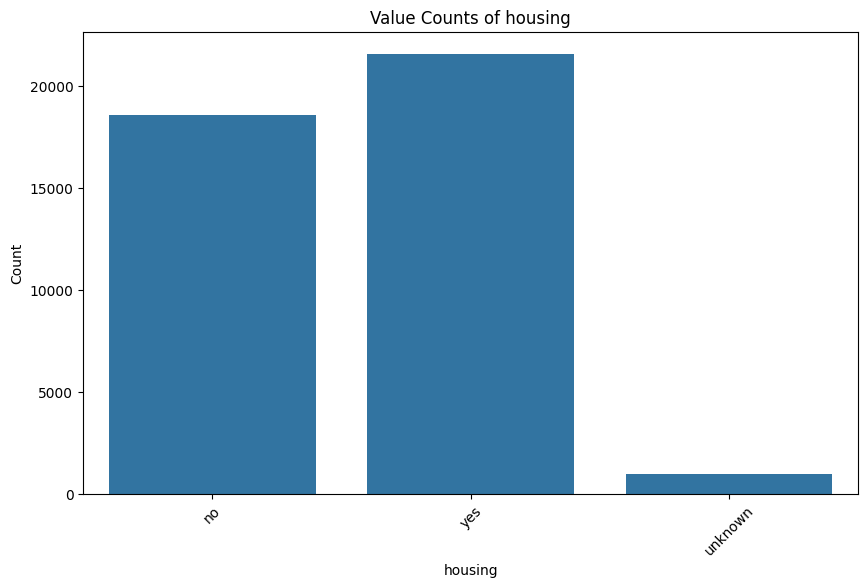

In [21]:
# `housing` column
analyze_object_column(data, 'housing')

**Observation from `housing` column:**

1. The `housing` column contains 3 unique categories: 'no', 'yes', and 'unknown'.
2. The value counts and the plot show that 'yes' and 'no' have a similar number of entries, with 'yes' being slightly more frequent.
3. The 'unknown' category has a smaller number of entries.

#### 6. `loan` column

--- Analysis for column: loan ---

Unique values:
['no' 'yes' 'unknown']

Value counts:
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64


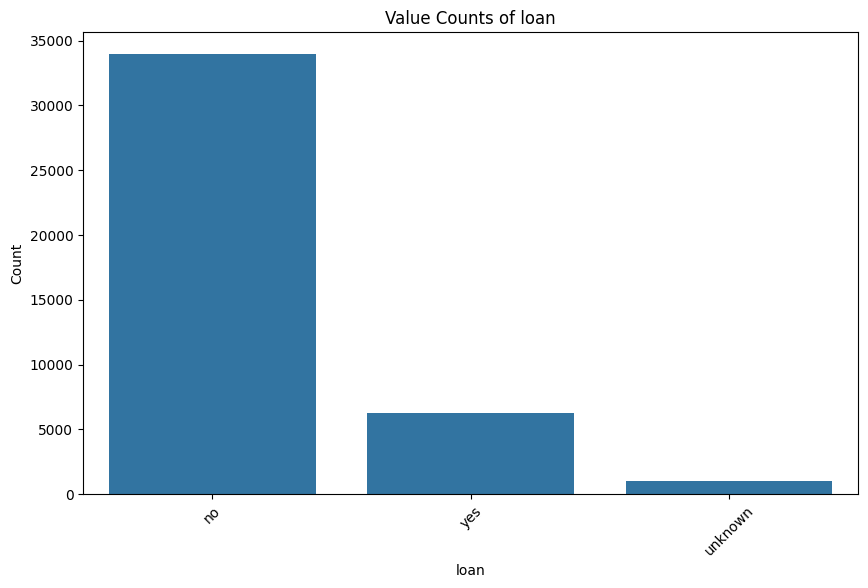

In [22]:
# `loan` column
analyze_object_column(data, 'loan')

**Observation from `loan` column:**

1. The `loan` column contains 3 unique categories: 'no', 'yes', and 'unknown'.
2. The value counts and the plot show that 'no' is the most frequent category, while 'yes' has a smaller number of entries.
3. The 'unknown' category has the same number of entries as in the `housing` column.

#### 7. `contact` column

--- Analysis for column: contact ---

Unique values:
['telephone' 'cellular']

Value counts:
contact
cellular     26144
telephone    15044
Name: count, dtype: int64


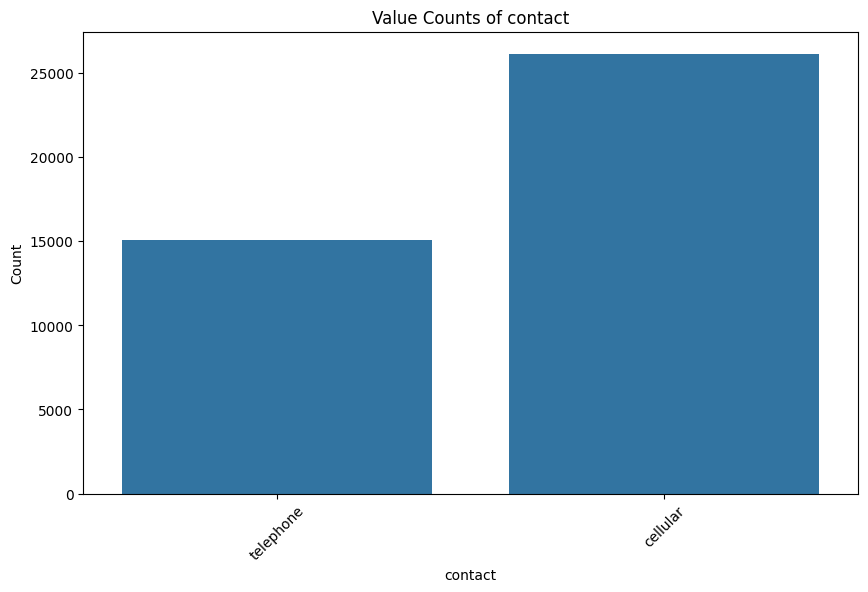

In [23]:
# `contact` column
analyze_object_column(data, 'contact')

**Observation from `contact` column:**

1. The `contact` column contains 2 unique categories: 'cellular' and 'telephone'.
2. The value counts and the plot show that 'cellular' is the more frequent contact type.
3. There are no 'unknown' values in this column.

#### 8. `month` column

--- Analysis for column: month ---

Unique values:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Value counts:
month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64


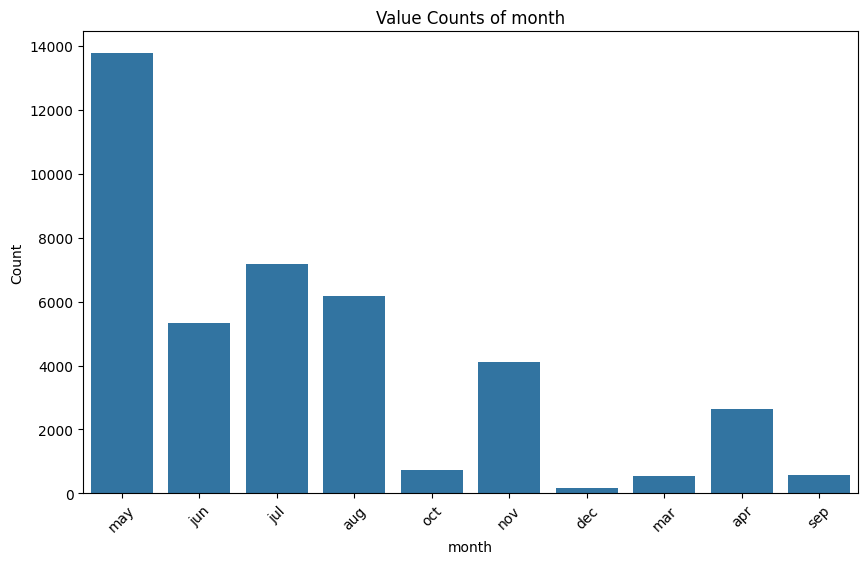

In [24]:
# `month` column
analyze_object_column(data, 'month')

**Observation from `month` column:**

1. The `month` column contains 10 unique categories, representing months from March to December.
2. The months January and February are missing.
3. The value counts and the plot show that 'may', 'jul', and 'aug' are the most frequent months in the dataset.

**Possible reason for the missing of January and February from the dataset**:

Based on the context of this dataset being related to a bank marketing campaign, the absence of January and February could be due to a few reasons:

* **Campaign Period**: The marketing campaign might not have been active during those months. The data could represent only the period when the campaign was running.
* **Seasonal Marketing**: The bank might focus its marketing efforts during specific times of the year, and January and February might not be part of their target seasons for this type of campaign.
* **Data Collection Period**: The data collection for this dataset might have started after February or ended before March of the following year.

#### 9. `day_of_week` column

--- Analysis for column: day_of_week ---

Unique values:
['mon' 'tue' 'wed' 'thu' 'fri']

Value counts:
day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64


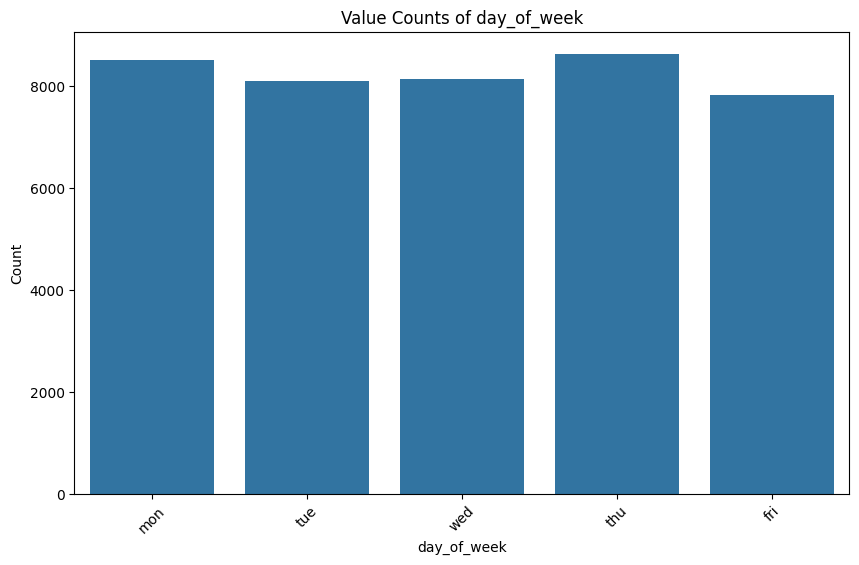

In [25]:
# `day_of_week` column
analyze_object_column(data, 'day_of_week')

**Observation from `day_of_week` column:**

1. The `day_of_week` column contains 5 unique categories: 'mon', 'tue', 'wed', 'thu', and 'fri'.
2. The value counts and the plot show that the distribution across these days is relatively even.
3. The weekend days (Saturday and Sunday) are missing from the dataset.

**Possible reason for the missing weekend days from the dataset**:

Given that this dataset is related to a bank marketing campaign, the most likely reason for the absence of weekend days (Saturday and Sunday) is that the marketing calls or interactions were only conducted during weekdays. This is a common practice for businesses to align their outreach with standard working hours and days.

#### `poutcome` column

--- Analysis for column: poutcome ---

Unique values:
['nonexistent' 'failure' 'success']

Value counts:
poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64


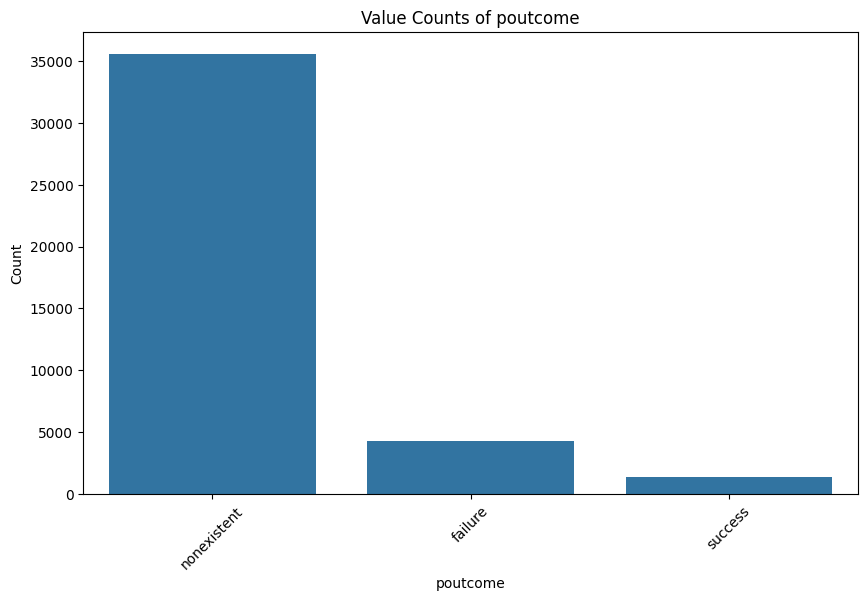

In [26]:
# `poutcome` column
analyze_object_column(data, 'poutcome')

**Observation from `poutcome` column:**

1. The `poutcome` column contains 3 unique categories: 'nonexistent', 'failure', and 'success'.
2. The value counts and the plot show that 'nonexistent' is the most frequent outcome, indicating that for the majority of contacts, there was no previous campaign.
3. Among those with previous contact, 'failure' is more common than 'success'.

#### `y` - the target column

--- Analysis for column: y ---

Unique values:
['no' 'yes']

Value counts:
y
no     36548
yes     4640
Name: count, dtype: int64


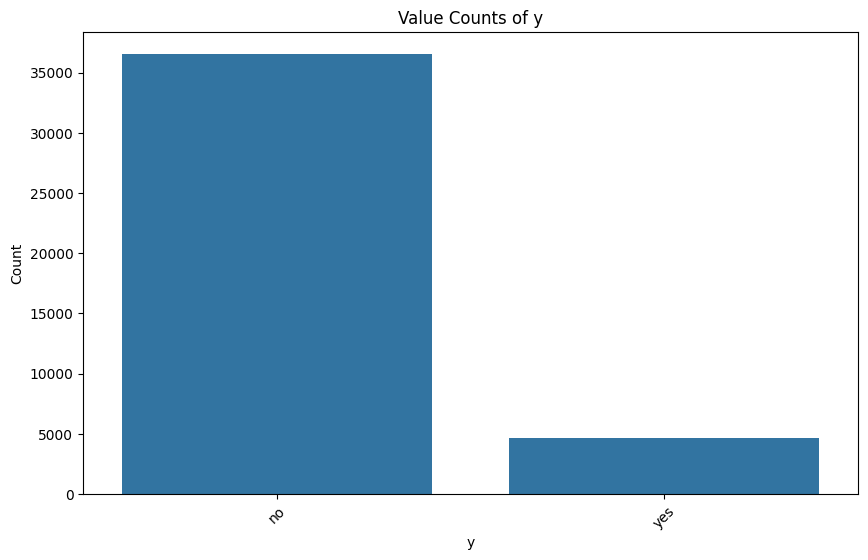

In [27]:
# `y` - target column
analyze_object_column(data, 'y')

**Observation from `y` column:**

1. The `y` column, which is the target variable, contains two unique categories: 'yes' and 'no'.
2. The value counts and the plot show a significant class imbalance, with 'no' being the majority class (36,548 entries) and 'yes' being the minority class (4,640 entries).
3. This imbalance means that a model trained on this data might be biased towards predicting the majority class ('no'), leading to poor performance in identifying the minority class ('yes').

To address this class imbalance during model development, several techniques can be considered:

*   **Resampling Techniques:**
    *   **Oversampling:** Increase the number of instances in the minority class (e.g., SMOTE - Synthetic Minority Over-sampling Technique).
    *   **Undersampling:** Decrease the number of instances in the majority class.

*   **Algorithmic Approaches:** Some algorithms are inherently more robust to class imbalance or have parameters to handle it (e.g., using `class_weight` in scikit-learn models).


### Exploration of Numberical columns

In [30]:
# Helper function
def analyze_numeric_column(dataframe, column_name):
    if column_name in dataframe.columns and pd.api.types.is_numeric_dtype(dataframe[column_name]):
        print(f"--- Analysis for column: {column_name} ---")

        # 1. Summary statistics
        print("\nSummary Statistics:")
        print(dataframe[column_name].describe())

        # 2. Histogram
        plt.figure(figsize=(8, 5))
        sns.histplot(data=dataframe, x=column_name, kde=True)
        plt.title(f'Distribution of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.show()

        # 3. Box plot
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=dataframe, x=column_name)
        plt.title(f'Box Plot of {column_name}')
        plt.xlabel(column_name)
        plt.show()

    else:
        print(f"Column '{column_name}' not found or is not a numeric type.")

#### 1. `age` column

--- Analysis for column: age ---

Summary Statistics:
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


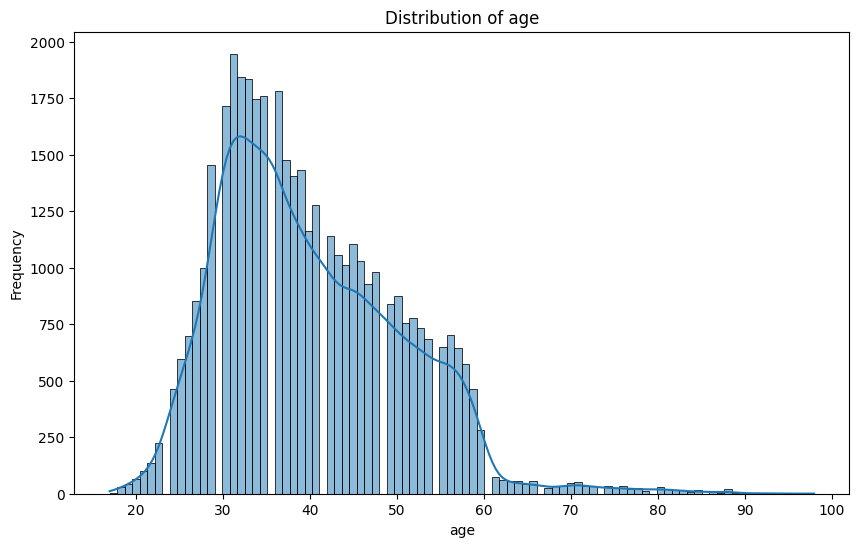

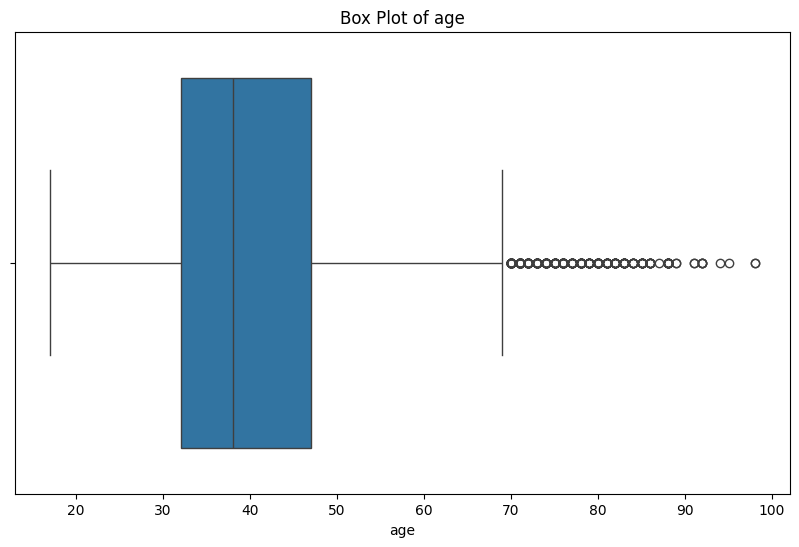

In [31]:
# Explore age column
analyze_numeric_column(data, "age")

**Observation from `age` column:**

1. The summary statistics show that the average age is around 40 years, with a standard deviation of about 10.4.
2. The age ranges from 17 to 98.
3. The histogram indicates a roughly normal distribution of age, with the majority of individuals between 30 and 50 years old.
4. The box plot confirms the distribution and shows some outliers at higher ages.

#### 2. `duration` column

--- Analysis for column: duration ---

Summary Statistics:
count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


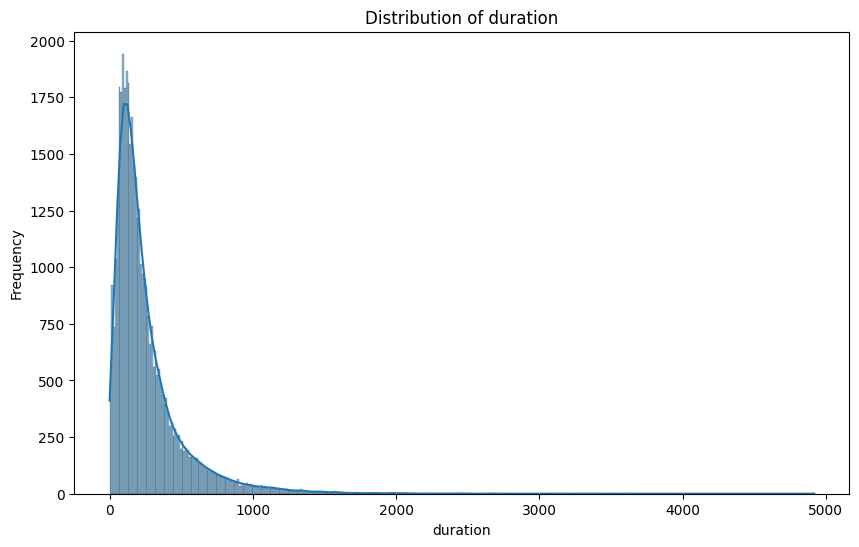

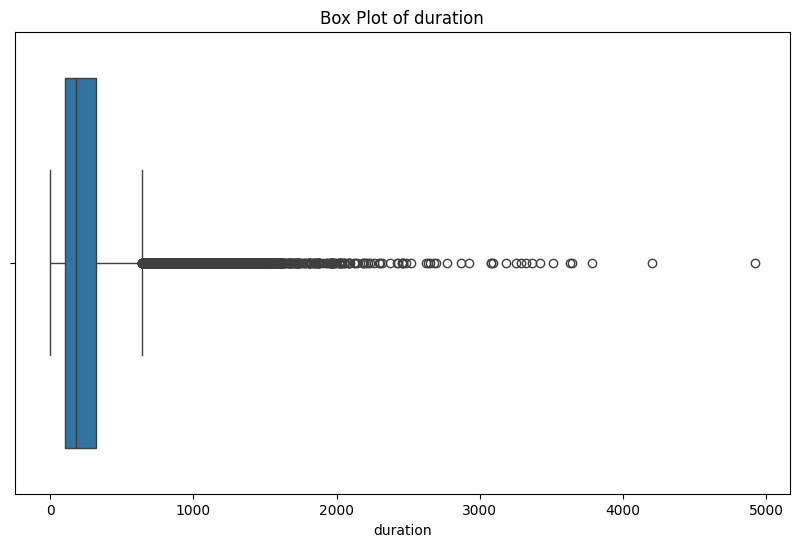

In [33]:
# Explore `duration` column
analyze_numeric_column(data, "duration")

**Observation from `duration` column:**

1. The summary statistics for the `duration` column show a wide range of values, from 0 to 4918 seconds, with a mean of around 258 seconds.
2. The histogram reveals a heavily skewed distribution, with most contact durations being relatively short and a long tail extending towards longer durations.
3. The box plot clearly shows the presence of many outliers with very long contact durations.

#### 3. `campaign` column

--- Analysis for column: campaign ---

Summary Statistics:
count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


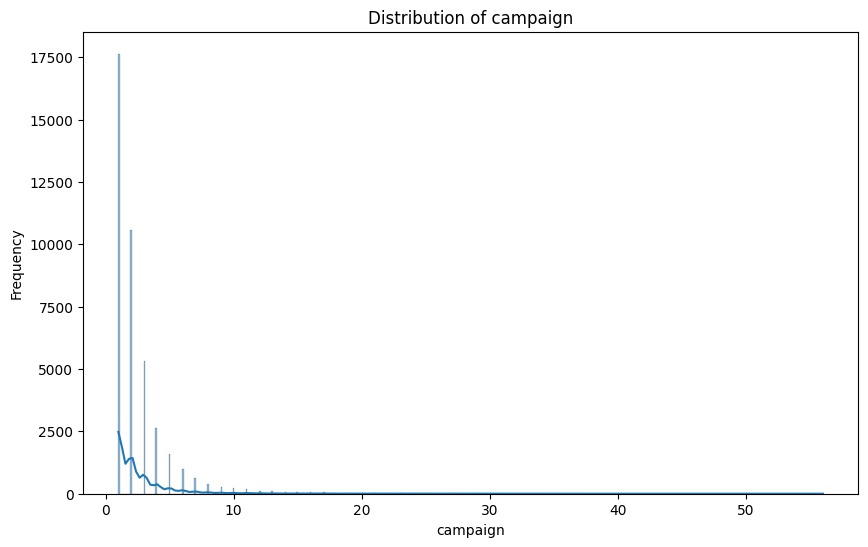

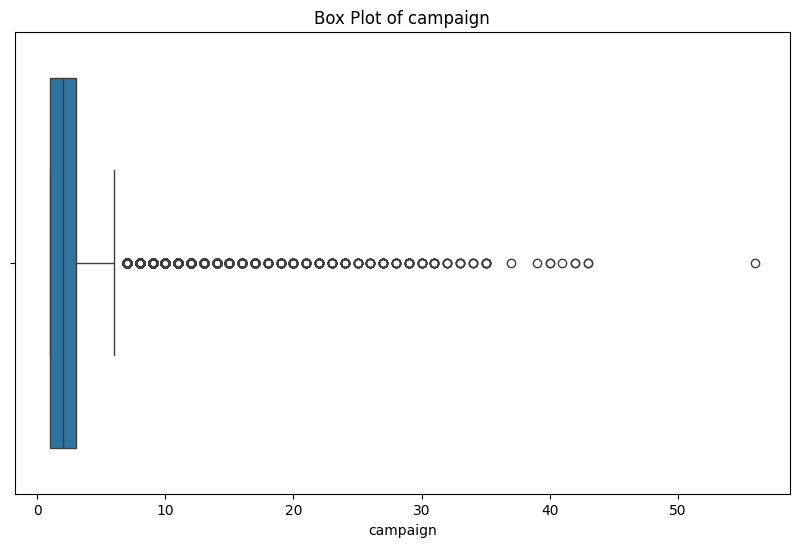

In [35]:
# Explore `campaign` column
analyze_numeric_column(data, "campaign")

**Observation from `campaign` column:**

1. The summary statistics for the `campaign` column show that the number of contacts during this campaign ranges from 1 to 56, with a mean of around 2.57.
2. The histogram and box plot indicate a highly skewed distribution, with most individuals being contacted only a few times.
3. There are many outliers representing individuals who were contacted a significantly higher number of times.

#### 4. `pdays` column

--- Analysis for column: pdays ---

Summary Statistics:
count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64


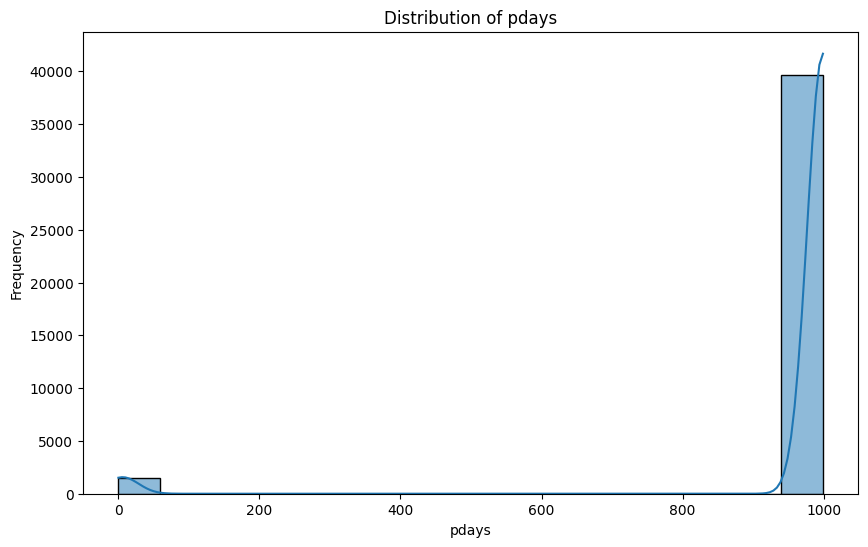

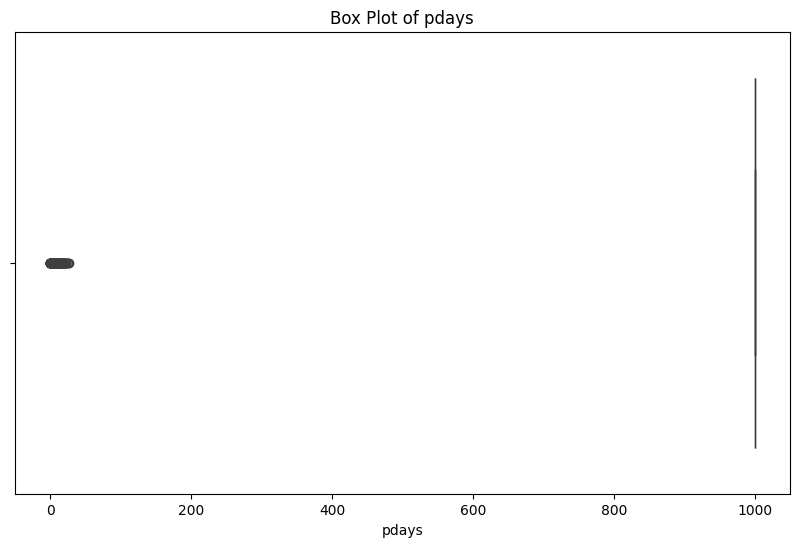

In [37]:
# Explore `pdays` column
analyze_numeric_column(data, "pdays")

**Observation from `pdays` column:**

1. The summary statistics for the `pdays` column show a minimum value of 0 and a maximum value of 999.
2. The mean is around 962, with a large standard deviation.
3. The histogram and box plot are dominated by the value 999.

4. Considering that a value of 999 in the `pdays` column indicates that the client was not previously contacted, the analysis shows that a large majority of individuals in this dataset have not been contacted in previous campaigns.
5. This is evident from the high count, median, and 75th percentile being 999.
6. For the individuals who were previously contacted (pdays < 999), the values represent the number of days since their last contact.

#### 5. `previous` column

--- Analysis for column: previous ---

Summary Statistics:
count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64


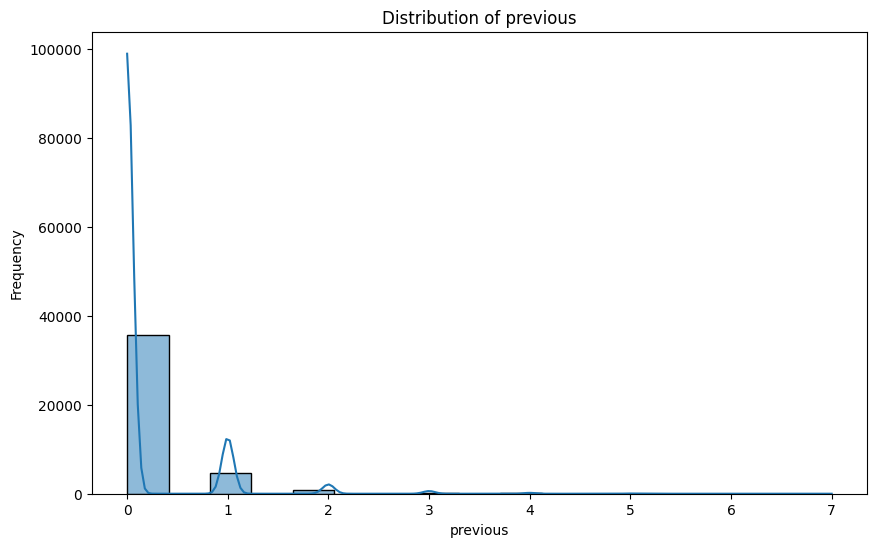

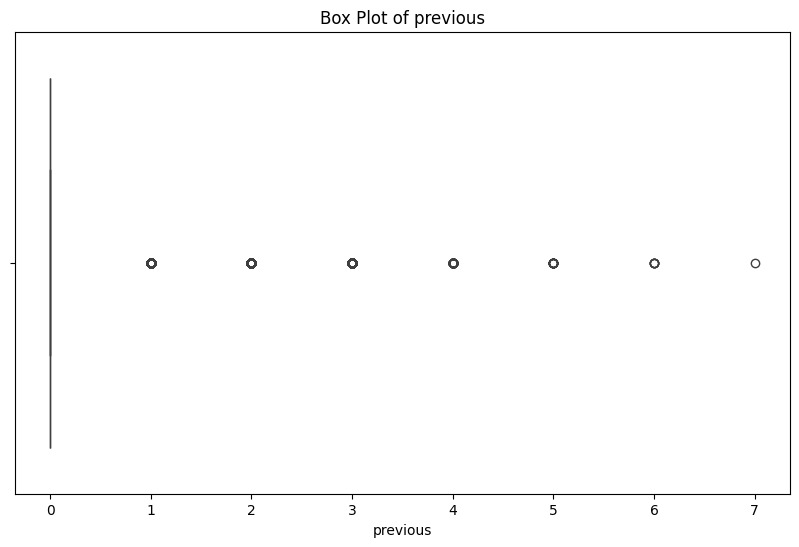

In [39]:
# Explore `previous` column
analyze_numeric_column(data, "previous")

**Observation from `previous` column:**

1. The summary statistics for the `previous` column show that the number of contacts performed before this campaign for this client ranges from 0 to 7, with a mean of around 0.17.
2. The histogram and box plot indicate that for the vast majority of individuals, there were no previous contacts.
3. The distribution is heavily skewed towards 0, with a few outliers representing individuals who were contacted a small number of times previously.

#### 6. `emp.var.rate` column

--- Analysis for column: emp.var.rate ---

Summary Statistics:
count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64


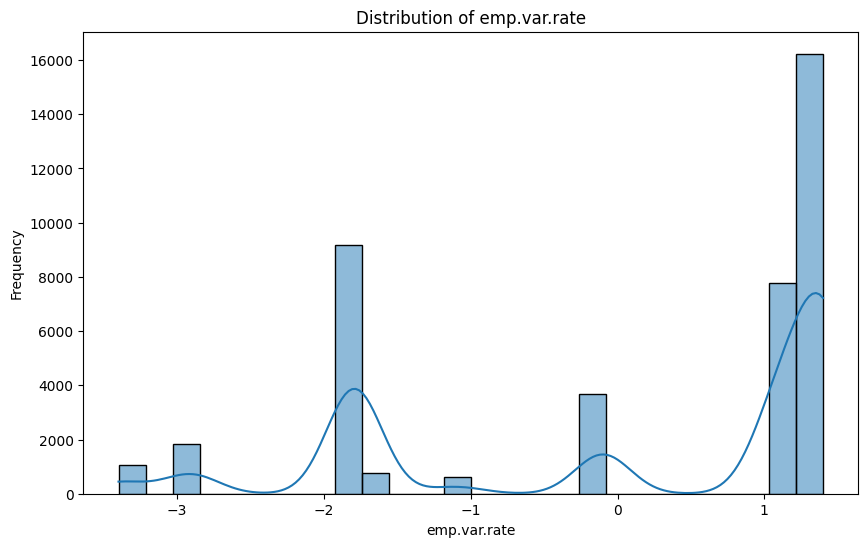

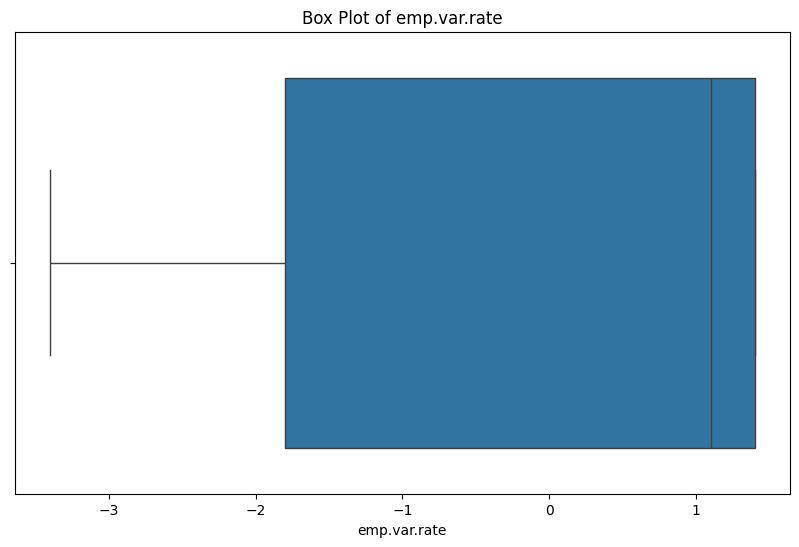

In [41]:
# Explore `emp.var.rate` column
analyze_numeric_column(data, "emp.var.rate")

**Observation from `emp.var.rate` column:**

1. The summary statistics for the `emp.var.rate` column show a range of values from -3.4 to 1.4, with a mean close to 0.
2. The histogram and box plot show that there are distinct clusters of values, with the most frequent values being around 1.4, -1.8, and -3.4.
3. This suggests that the `emp.var.rate` is not a continuously varying feature but rather takes on a limited number of specific values, likely representing different economic or employment conditions during the campaign period.

#### 7. `cons.price.idx` column

--- Analysis for column: cons.price.idx ---

Summary Statistics:
count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64


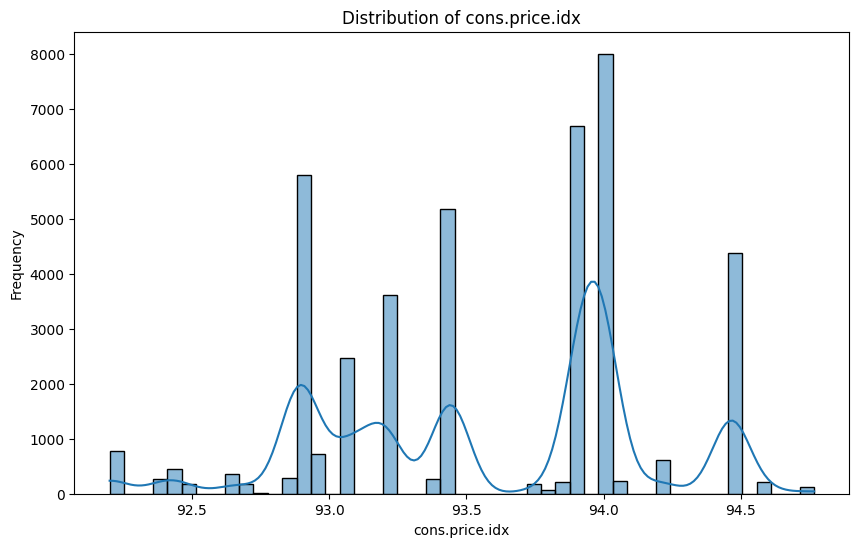

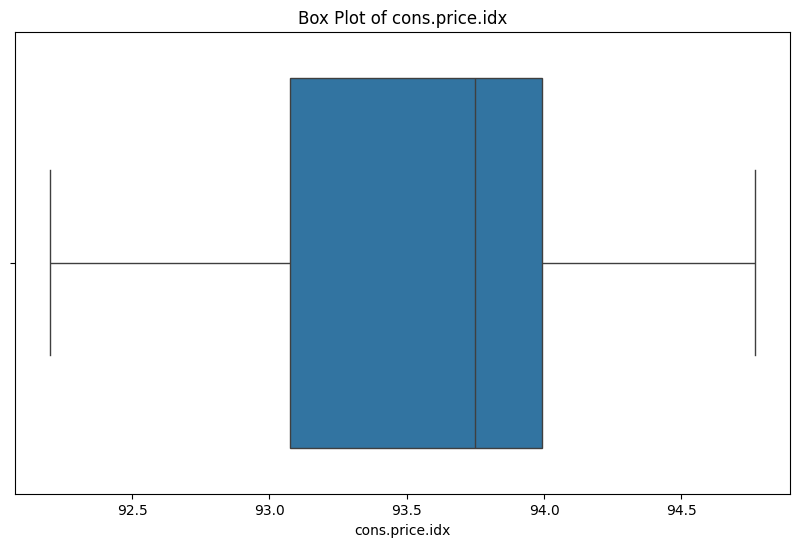

In [43]:
# Explore `cons.price.idx` column
analyze_numeric_column(data, "cons.price.idx")

**Observation from `cons.price.idx` column:**

1. The summary statistics for the `cons.price.idx` column show a relatively narrow range of values, from 92.201 to 94.767, with a mean around 93.576.
2. The standard deviation is small, indicating that the values are clustered around the mean.
3. The histogram shows a multi-modal distribution with several distinct peaks, suggesting that the consumer price index took on specific values during the period of the campaign.
4. The box plot confirms the relatively tight distribution with some potential outliers.

#### 8. `cons.conf.idx` column

--- Analysis for column: cons.conf.idx ---

Summary Statistics:
count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64


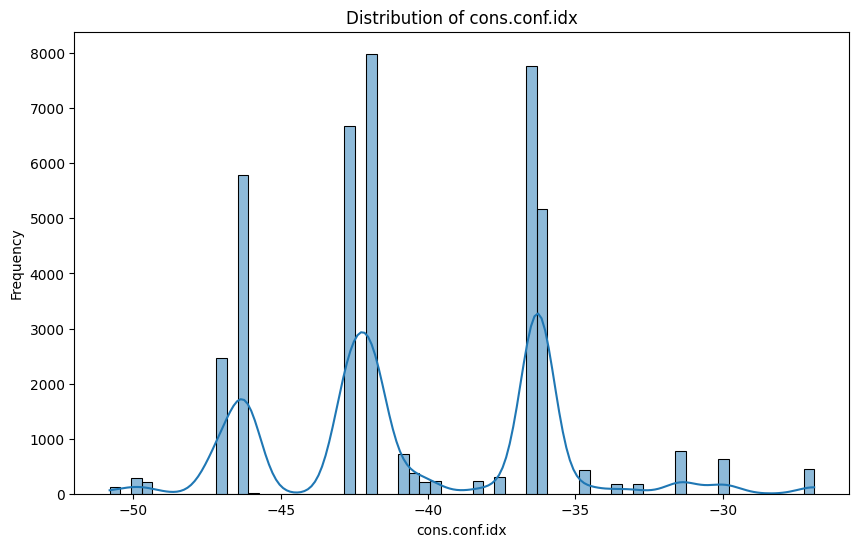

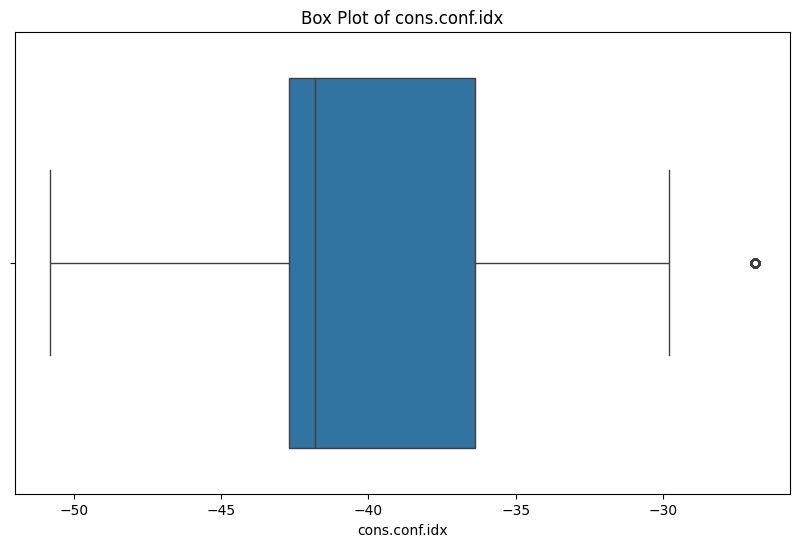

In [48]:
# Explore `cons.conf.idx` column
analyze_numeric_column(data, "cons.conf.idx")

**Observation from `cons.conf.idx` column:**

1. The summary statistics for the `cons.conf.idx` column show a range of values from -50.8 to -26.9, with a mean around -40.5.
2. The standard deviation is about 4.6.
3. The histogram shows a multi-modal distribution with several distinct peaks, similar to the `cons.price.idx` column, suggesting that the consumer confidence index also took on specific values during the campaign period.
4. The box plot confirms the distribution and shows some potential outliers.

#### 9. `nr.employed` column

--- Analysis for column: nr.employed ---

Summary Statistics:
count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64


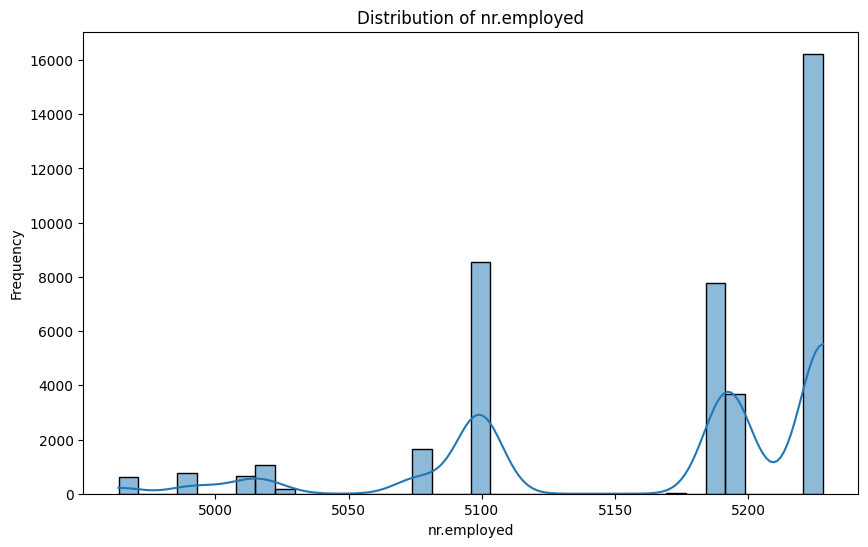

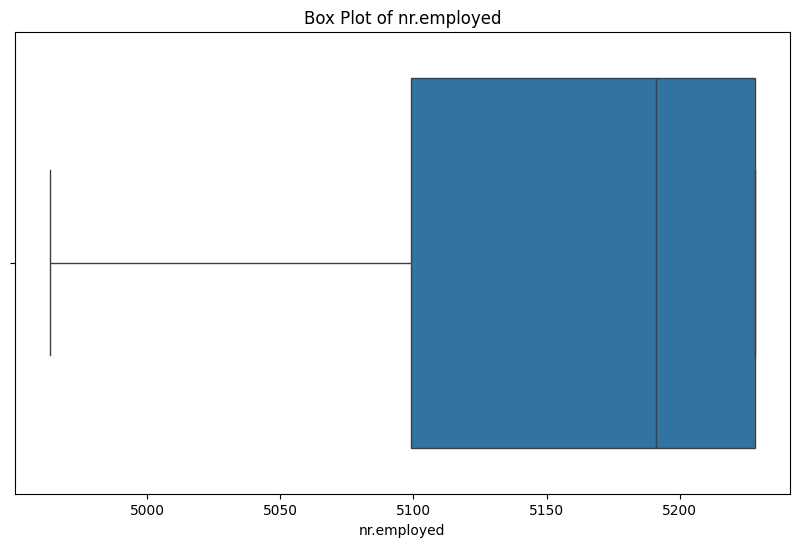

In [49]:
# Explore `nr.employed` column
analyze_numeric_column(data, "nr.employed")

**Observation from `nr.employed` column:**

1. The summary statistics for the `nr.employed` column show a range of values from 4963.6 to 5228.1, with a mean around 5167.0.
2. The standard deviation is relatively small, about 72.25.
3. The histogram shows distinct peaks at specific values, indicating that the number of employees is not a continuously varying feature but rather takes on a limited number of values, likely representing different time periods or economic conditions during the campaign.
4. The box plot confirms these distinct values and shows a tight distribution around them.

#### 10. `euribor3m` column

--- Analysis for column: euribor3m ---

Summary Statistics:
count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64


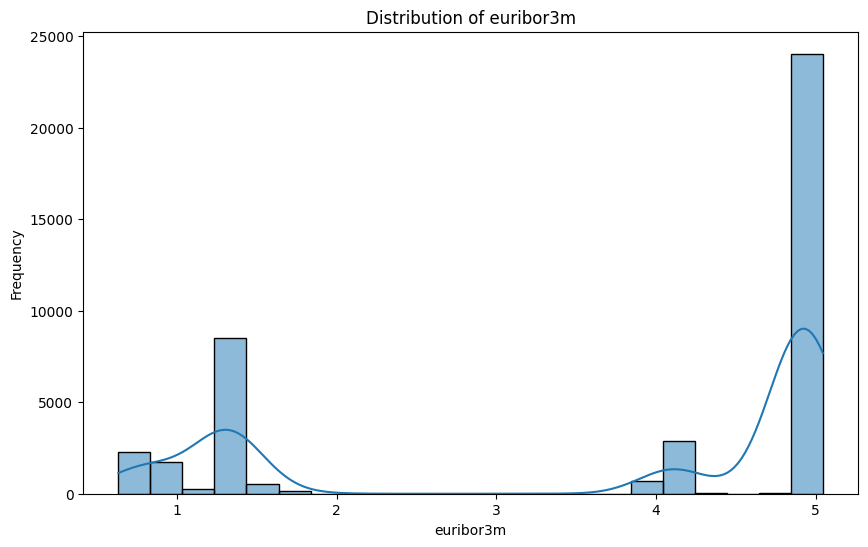

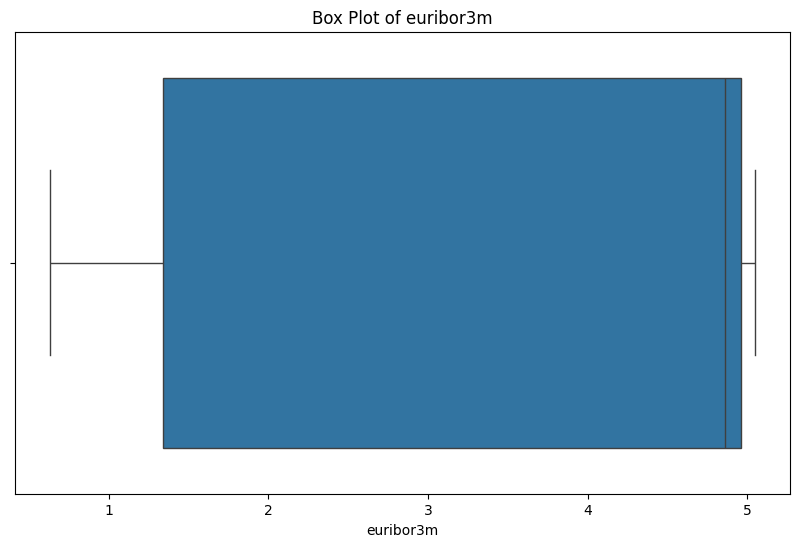

In [51]:
# Explore `euribor3m` column
analyze_numeric_column(data, "euribor3m")

**Observation from `euribor3m` column:**

1. The summary statistics for the `euribor3m` column show a range of values from 0.634 to 5.045, with a mean around 3.621.
2. The standard deviation is about 1.734.
3. The histogram shows a multi-modal distribution with distinct peaks at different values, suggesting that the Euribor 3 month rate varied and took on specific values during the campaign period.
4. The box plot confirms this distribution and shows a tight range of values.

## Correlation Heatmap for Numerical Features

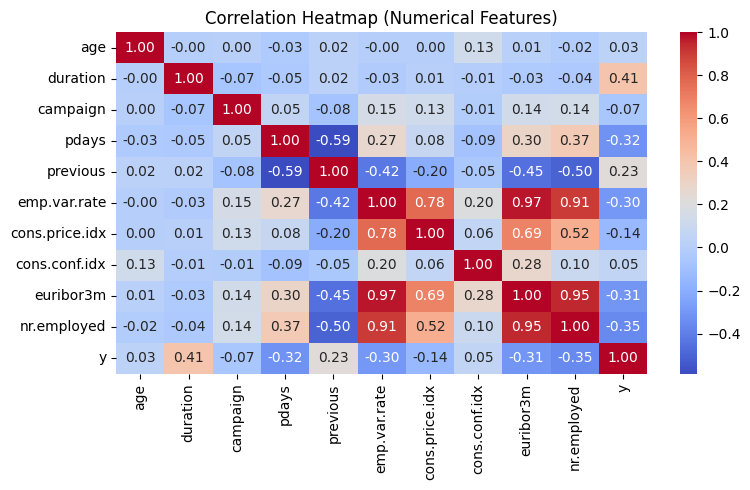

In [3]:
# Prepare data
data_corr = data.copy()
data_corr['y'] = data_corr['y'].map({'no': 0, 'yes': 1})

# Plot
plt.figure(figsize=(8, 5))
sns.heatmap(data_corr.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numerical Features)')
plt.tight_layout()
plt.show()

**Observation from Correlation Heatmap:**

1. The correlation heatmap shows the pairwise correlation coefficients between the numerical features in the dataset, including the target variable 'y' (mapped to 0 and 1).

2. Key observations:
*   **`y` (target variable) correlations:** The target variable `y` shows the strongest positive correlation with `duration` (0.41), indicating that longer contact durations are associated with a higher likelihood of subscribing. It also has a notable negative correlation with `nr.employed` (-0.52), `euribor3m` (-0.31), and `emp.var.rate` (-0.30), suggesting that lower employment variation rates, Euribor rates, and number of employees are related to higher subscription rates. There is a weak positive correlation with `previous` (0.23) and a weak negative correlation with `pdays` (-0.32) and `campaign` (-0.07), which is expected as `pdays` is 999 for most observations.
*   **High correlations among economic indicators:** There are strong correlations among the economic indicator features:
    *   `emp.var.rate` is highly positively correlated with `euribor3m` (0.97) and `nr.employed` (0.90).
    *   `euribor3m` is highly positively correlated with `nr.employed` (0.97).
    *   `cons.price.idx` is positively correlated with `emp.var.rate` (0.28), `euribor3m` (0.27), and `nr.employed` (0.11), and negatively correlated with `cons.conf.idx` (-0.60).
*   **Other correlations:** `age`, `campaign`, `pdays`, and `previous` show generally weaker correlations with other features compared to the economic indicators.

3. These correlations highlight the relationships between the numerical features and the target variable, providing insights into which features might be more influential in predicting subscription. The strong correlations among the economic indicators also suggest potential multicollinearity, which might need to be considered during model building depending on the chosen algorithm.

## Distribution of Key Numerical Features

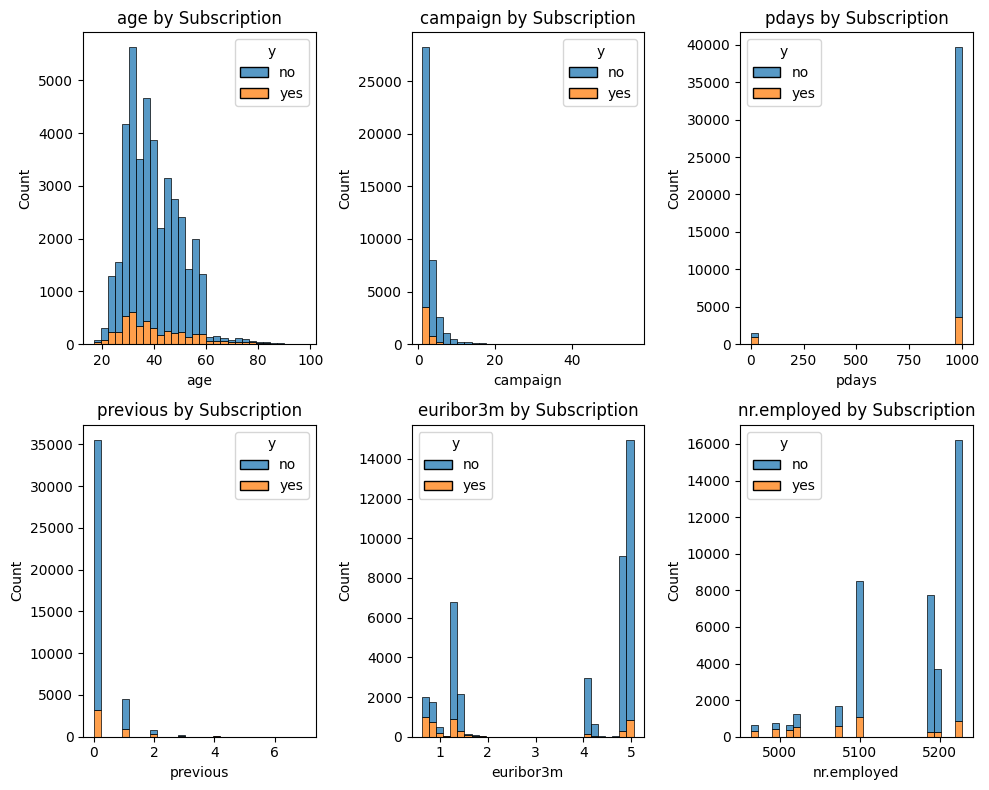

In [6]:
# Plotting
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
features = ['age', 'campaign', 'pdays', 'previous', 'euribor3m', 'nr.employed']
for idx, feature in enumerate(features):
    sns.histplot(data=data, x=feature, hue='y', multiple='stack', bins=30, ax=axes[idx//3, idx%3])
    axes[idx//3, idx%3].set_title(f'{feature} by Subscription')
plt.tight_layout()
plt.show()

**Observation from Distribution Plots:**

The histograms showing the distribution of key numerical features by subscription status (`y`) reveal several insights:

*   **`age`:** The distribution of age for both subscribed ('yes') and not subscribed ('no') individuals appears somewhat similar, with a peak in the 30s and 40s. There isn't a strong visual separation based on age alone.
*   **`campaign`:** The majority of individuals in both groups were contacted only a few times. However, the proportion of 'yes' subscriptions decreases as the number of contacts (`campaign`) increases, suggesting that repeated contacts beyond a certain point may not be effective or could even be counterproductive.
*   **`pdays`:** As expected, a large spike at 999 for both 'yes' and 'no' indicates no previous contact. Among those with previous contact (pdays < 999), there seems to be a slightly higher proportion of 'yes' subscriptions for lower `pdays` values, suggesting that recent contact in a previous campaign might be more likely to result in a subscription in the current campaign.
*   **`previous`:** Similar to `pdays`, the distribution is heavily skewed towards 0 (no previous contacts). For individuals with previous contacts, there is a higher likelihood of subscribing, which aligns with the observation from `pdays`.
*   **`euribor3m` and `nr.employed`:** These two features show similar patterns due to their high correlation. Lower values of `euribor3m` and `nr.employed` appear to have a higher proportion of 'yes' subscriptions compared to higher values. This suggests that the economic context (represented by these indicators) during the campaign period influences the subscription rate.

These plots visually reinforce some of the relationships observed in the correlation heatmap and provide more detailed insights into how the distribution of these features differs between those who subscribed and those who did not.

## Outlier Detection

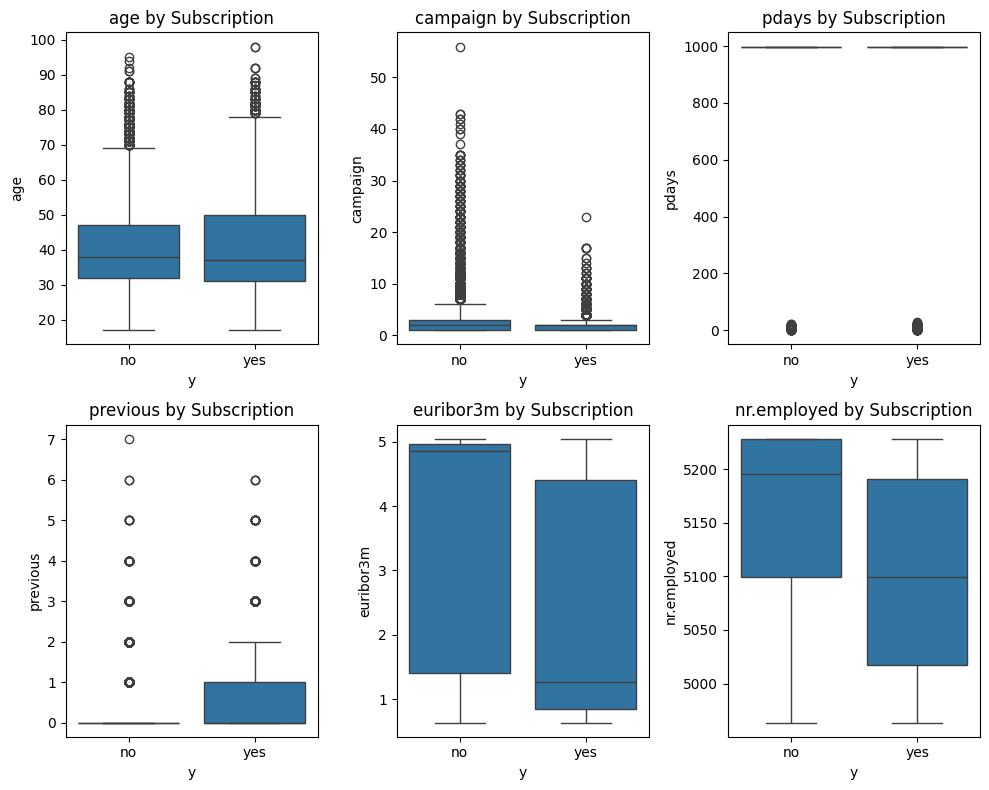

In [8]:
# Plot
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
for idx, feature in enumerate(features):
    sns.boxplot(data=data, x='y', y=feature, ax=axes[idx//3, idx%3])
    axes[idx//3, idx%3].set_title(f'{feature} by Subscription')
plt.tight_layout()
plt.show()

**Observation from Box Plots:**

The box plots showing the distribution of key numerical features by subscription status (`y`) provide insights into the spread and potential outliers within each group:

*   **`age`:** The median age appears similar for both subscribed ('yes') and not subscribed ('no') groups. However, the 'yes' group seems to have a slightly wider interquartile range (IQR) and more outliers at higher ages compared to the 'no' group.
*   **`campaign`:** Both groups show a heavily skewed distribution with many outliers representing a high number of contacts. The median number of contacts is low for both, but the 'no' group has a larger number of outliers with very high campaign values.
*   **`pdays`:** As seen before, the majority in both groups have a `pdays` of 999 (no previous contact). For those with previous contact, the box plot for the 'yes' group appears to have a slightly lower median `pdays` compared to the 'no' group, reinforcing the idea that more recent contact might be associated with subscription.
*   **`previous`:** Both groups are heavily skewed towards 0 previous contacts. The box plot for the 'yes' group shows a higher median and a wider range of `previous` contacts compared to the 'no' group, suggesting that individuals with prior contact are more likely to subscribe.
*   **`euribor3m` and `nr.employed`:** These box plots show that the 'yes' subscriptions are more concentrated at lower values of `euribor3m` and `nr.employed`, while the 'no' subscriptions are more spread across higher values of these economic indicators. This visually supports the negative correlation observed in the heatmap.

Overall, the box plots highlight the presence of outliers in several features, particularly `campaign`, `pdays`, and `previous`, and visually demonstrate the differences in the distribution of some numeric features between the subscribed and not subscribed groups.

## Categorical Feature Impact

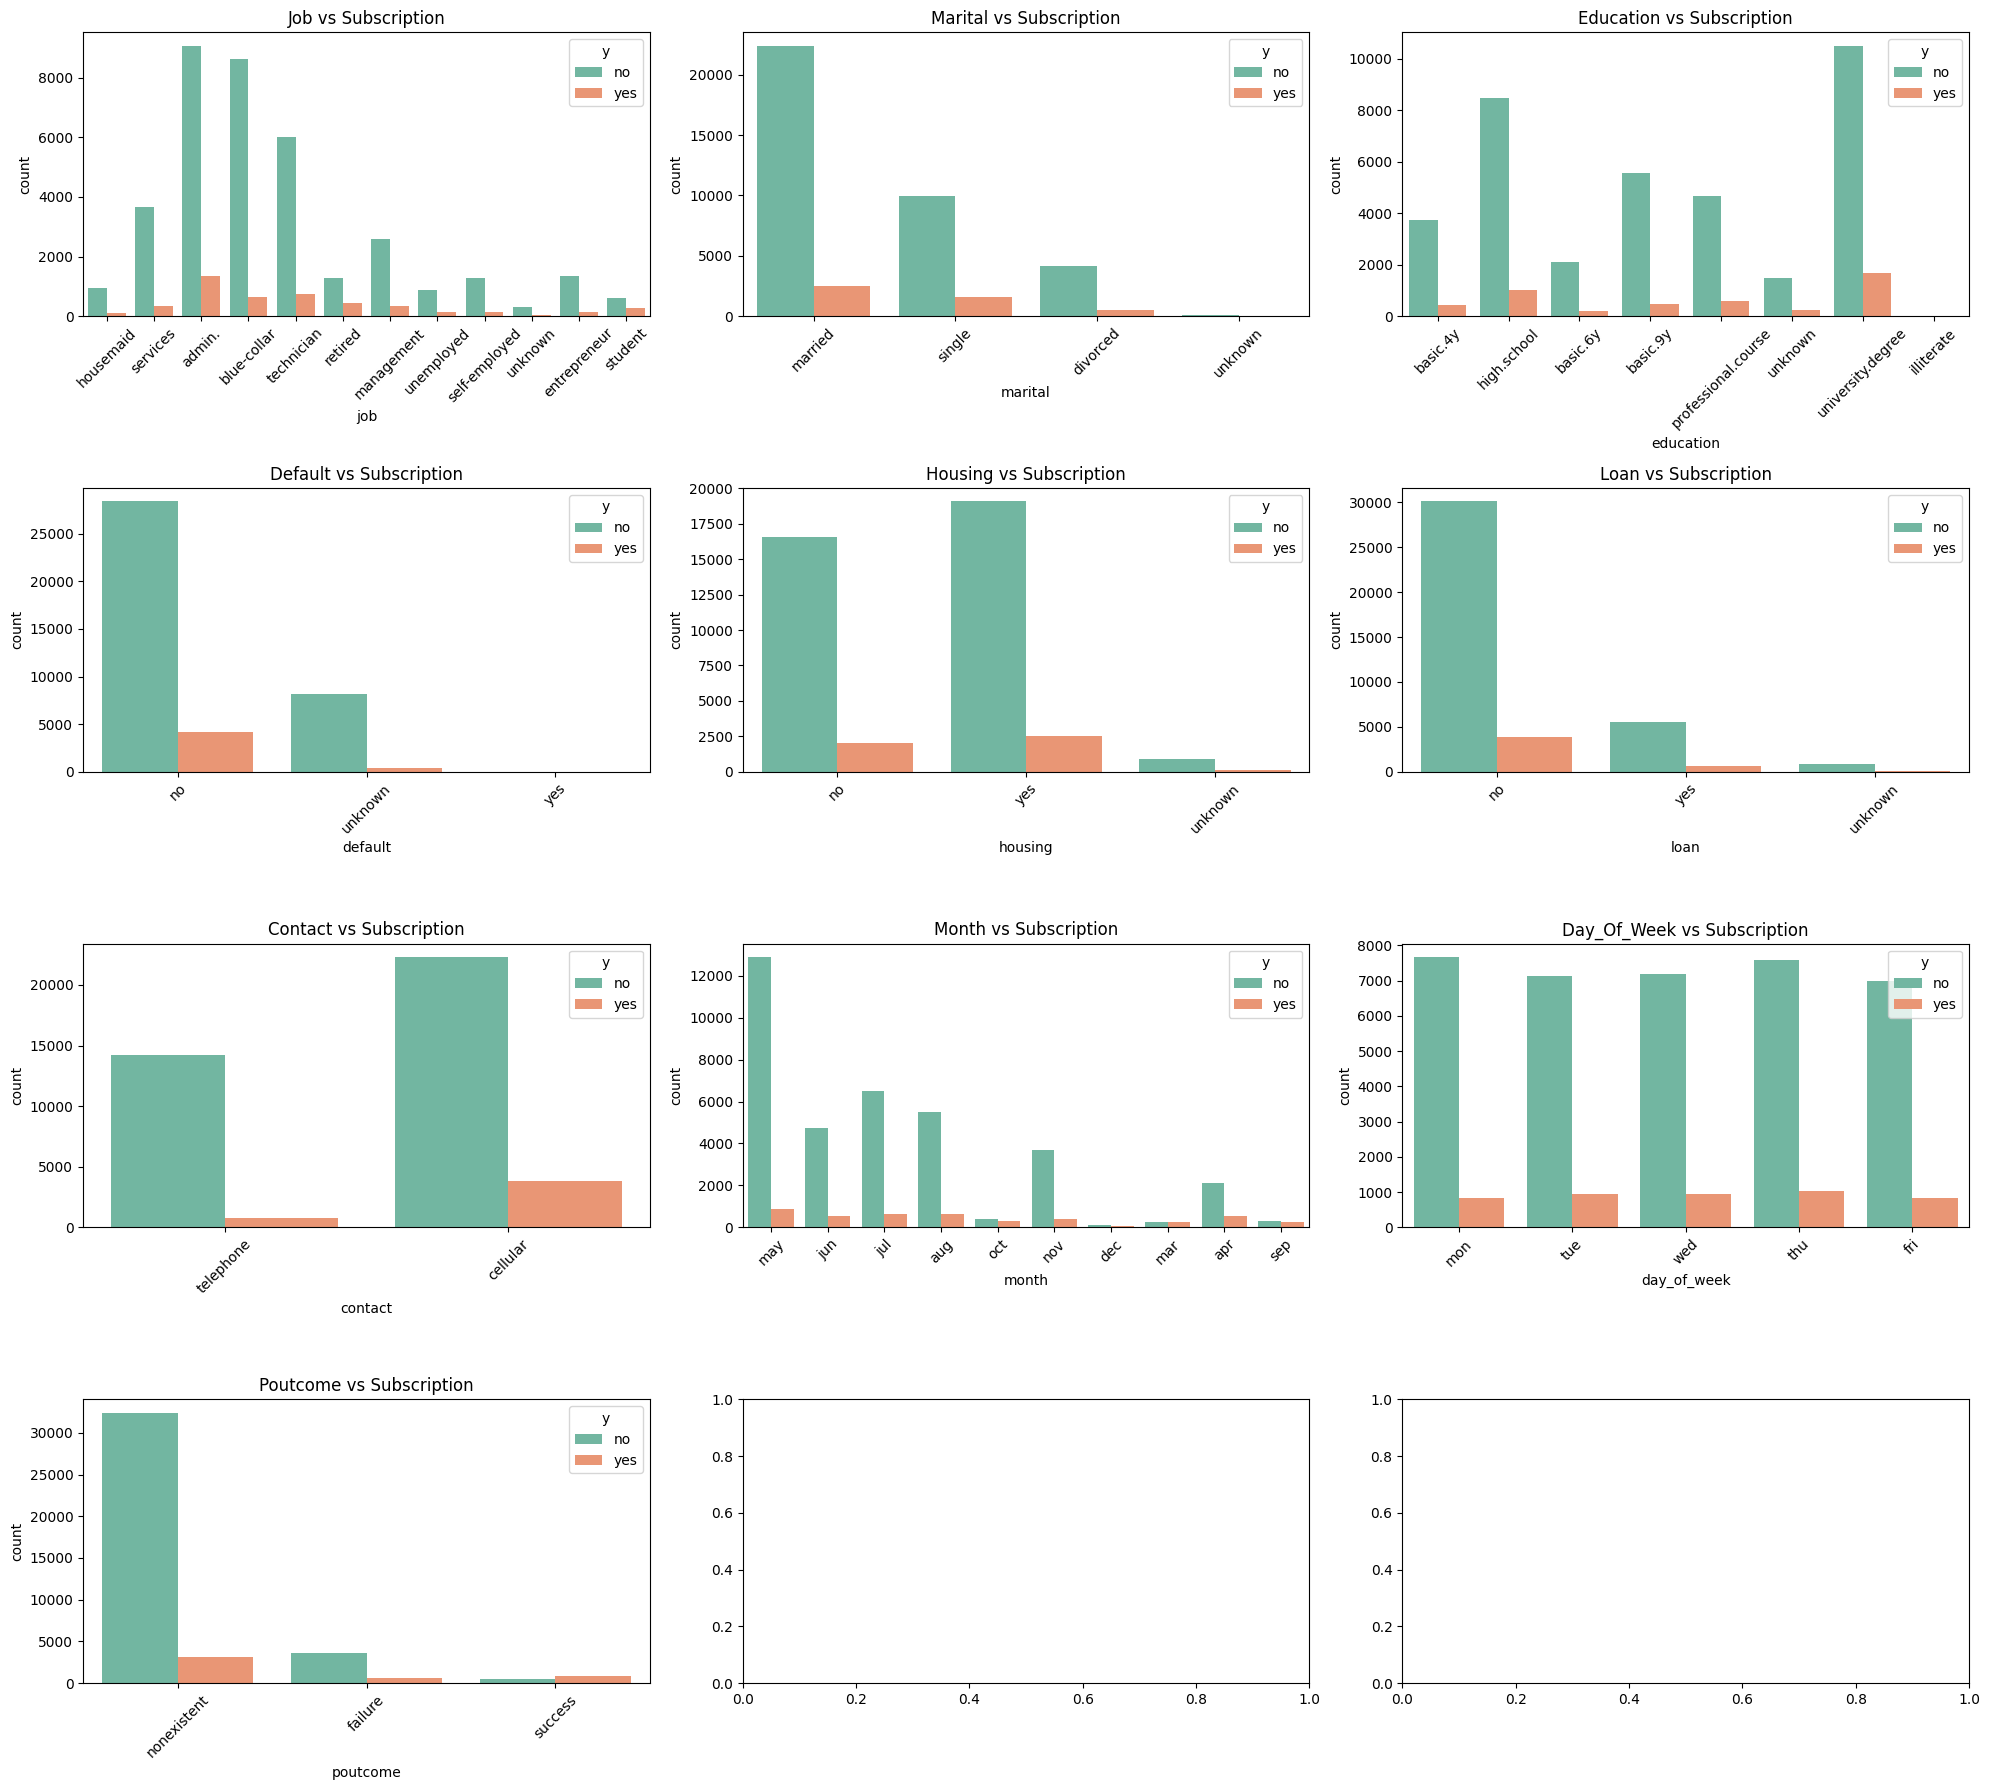

In [11]:
# Get features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Plot
fig, axes = plt.subplots(4, 3, figsize=(20, 18))
axes = axes.flatten()
for idx, feature in enumerate(categorical_features):
    sns.countplot(data=data, x=feature, hue='y', ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{feature.title()} vs Subscription')
    axes[idx].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

**Observation from Categorical Feature Plots:**

The count plots for categorical features by subscription status (`y`) reveal insights into how different categories within each feature relate to the likelihood of a client subscribing:

*   **`job`:** Some job categories, like `student` and `retired`, appear to have a higher proportion of 'yes' subscriptions compared to others. `Blue-collar` and `services` have a lower proportion of 'yes' subscriptions.
*   **`marital`:** `Single` individuals seem to have a slightly higher proportion of subscriptions compared to `married` or `divorced`. The `unknown` category has very few subscriptions.
*   **`education`:** `University.degree` and `professional.course` have a higher proportion of 'yes' subscriptions than basic education levels. `Illiterate` and `unknown` education levels have very few subscriptions.
*   **`default`:** Clients with a `yes` in default have almost no subscriptions. Clients with `no` default have a higher proportion of subscriptions compared to those with `unknown` default status.
*   **`housing` and `loan`:** There isn't a significant difference in the proportion of subscriptions between clients with `yes` or `no` for housing or loan. The `unknown` categories for both have fewer subscriptions.
*   **`contact`:** Clients contacted via `cellular` have a significantly higher number of subscriptions compared to those contacted via `telephone`.
*   **`month`:** Certain months, like `mar`, `sep`, `oct`, and `dec`, show a much higher proportion of 'yes' subscriptions relative to the total contacts in those months, suggesting that campaigns conducted during these months were more successful. May has the highest number of total contacts but a low proportion of subscriptions.
*   **`day_of_week`:** The distribution of subscriptions across weekdays is relatively similar, with no single day standing out as having a significantly higher proportion of subscriptions.
*   **`poutcome`:** Clients with a `success` in the previous campaign outcome have a dramatically higher proportion of 'yes' subscriptions in the current campaign compared to `failure` or `nonexistent`. This highlights the importance of previous campaign success.

These plots indicate that several categorical features, particularly `job`, `contact`, `month`, and `poutcome`, show notable differences in subscription rates across their categories and are likely important predictors of the target variable.

# Model Development

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE


import pickle

In [13]:
# Load data
df = pd.read_csv('/content/bank-additional-full.csv', sep = ";")
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [14]:
# Check `pdays` for unique values
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

The original `pdays` column has a large majority of values as 999, which indicates no previous contact. By creating a feature that is 1 if `pdays` is not 999 (meaning they were contacted before) and 0 if it is 999 (no previous contact), this will highlight a key distinction that could be more informative for a model than the raw numerical values of `pdays`, especially given the skewed distribution.

In [16]:
# Feature Engineering
df['contacted_before'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1)

In [17]:
# Drop columns not used
df.drop(['duration'], axis=1, inplace=True)

**Intuition for dropping the `duration` column:**

The `duration` column represents the length of the last contact in seconds. While the correlation heatmap showed that `duration` has the strongest positive correlation with the target variable `y` (whether the client subscribed), this feature is only known *after* the marketing call has been completed.

Therefore, the `duration` column is dropped to build a realistic and useful predictive model that can be used *before* contacting a client.

In [18]:
# Encode categorical variables
df = pd.get_dummies(df)

In [19]:
# Split features and target
X = df.drop('y', axis=1)
y = df['y']

In [20]:
# Scale numeric features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)


In [22]:
# Handle imbalance
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [35]:
# Train a base model model
model = RandomForestClassifier(class_weight = "balanced", n_estimators=200, random_state=42)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [36]:
# Evaluate
y_pred = model.predict(X_test)
metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "f1": f1_score(y_test, y_pred)
}

print("Metrics:")
print("Accuracy:", metrics['accuracy'])
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1 Score:", metrics['f1'])

Metrics:
Accuracy: 0.8896576839038601
Precision: 0.5141579731743666
Recall: 0.37176724137931033
F1 Score: 0.43151969981238275


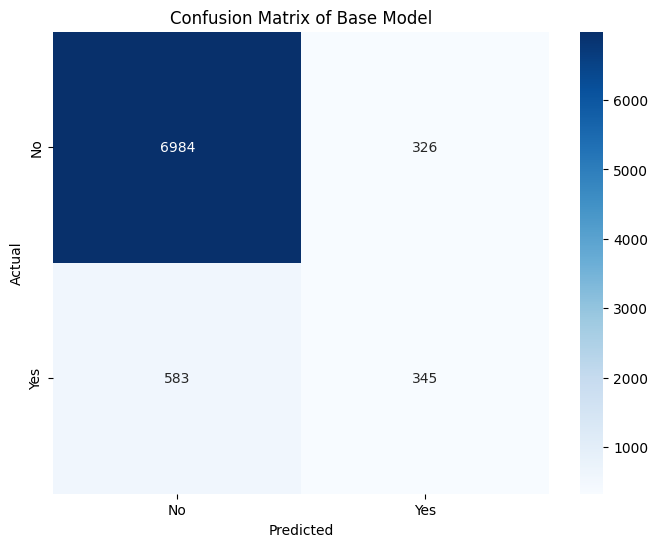

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Base Model')
plt.show()

In [38]:
# Model settled on
catb_model = CatBoostClassifier(verbose=0, random_state=42)
catb_model.fit(X_train_res, y_train_res)

In [39]:
# Evaluate
catb_y_pred = catb_model.predict(X_test)

# Matrics
catb_accuracy = accuracy_score(y_test, catb_y_pred)
catb_precision = precision_score(y_test, catb_y_pred)
catb_recall = recall_score(y_test, catb_y_pred)
catb_f1 = f1_score(y_test, catb_y_pred)

# Print matrics
print("Accuracy:", catb_accuracy)
print("Precision:", catb_precision)
print("Recall:", catb_recall)
print("F1 Score:", catb_f1)

Accuracy: 0.9011896091284293
Precision: 0.6158536585365854
Recall: 0.3265086206896552
F1 Score: 0.4267605633802817


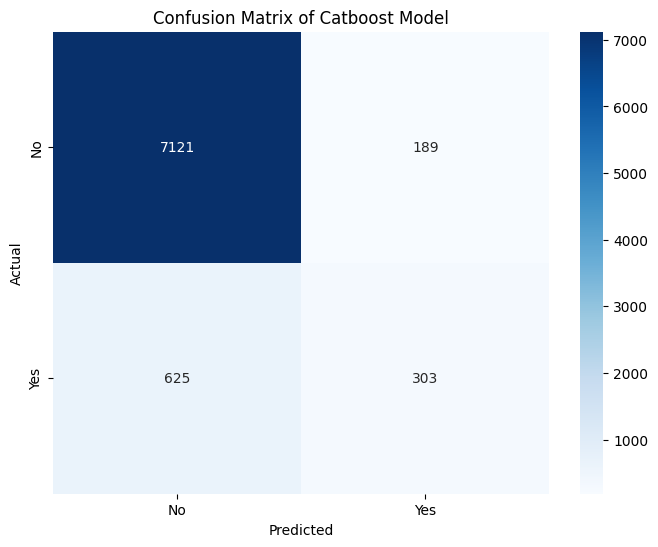

In [40]:
cm = confusion_matrix(y_test, catb_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Catboost Model')
plt.show()

In [41]:
# Save model
with open("model.pkl", "wb") as f:
    pickle.dump((catb_model, X.columns.tolist(), metrics), f)